# 3.3 다처원 배열의 계산

숫자가 한 줄로 늘어선 것이나 직사각형으로 늘어놓은 것, 

3차원으로 늘어놓은 것이나 N차원으로 나열하는 것을 통틀어 다차원 배열이라고 한다.

In [10]:
import numpy as np
import pprint

In [6]:
A = np.array([1,2,3,4]) #1차원
print(A.ndim)

1


In [14]:
B = np.array([[1,2],[3,4],[5,6]]) #2차원
print(B.ndim)
print(B.shape) #3개행 2개열; 3 x 2
pprint.pprint(B)

2
(3, 2)
array([[1, 2],
       [3, 4],
       [5, 6]])


### 3.3.2 행렬(Matrix)의 곱

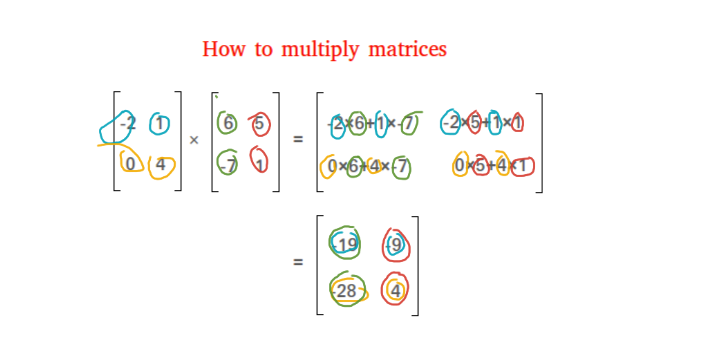

https://jamboard.google.com/d/1ZB2EJOoICHz1Sjyjk8Jg3nL8Sjl3jiNuH0lfwTbEmfA/viewer?pli=1&f=0

In [15]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])

print('A shape :',A.shape)
print('B shape :',B.shape)

A shape : (2, 2)
B shape : (2, 2)


In [16]:
# 행렬 곱
np.dot(A,B)

array([[19, 22],
       [43, 50]])

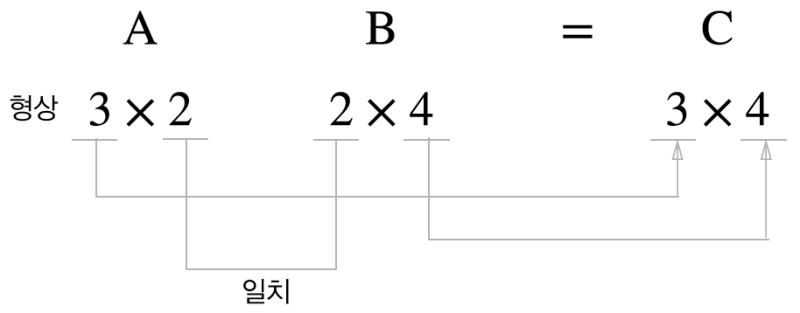

In [17]:
# 순서 중요
np.dot(B,A)

array([[23, 34],
       [31, 46]])

In [18]:
# 행렬의 차원이 변경이 된다면?

A = np.array([[1,2],[3,4]])
B = np.array([[5,6,7],[8,9,10]])

print('A shape :',A.shape)
print('B shape :',B.shape)

A shape : (2, 2)
B shape : (2, 3)


In [20]:
np.dot(A,B)

array([[21, 24, 27],
       [47, 54, 61]])

In [21]:
np.dot(B,A)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

Why do we have to calculate like this? What is the matrix doing to the vector?

### 3.3.3 신경망에서의 행렬 곱

In [25]:
X = np.array([1,2])
print(X.shape)

W = np.array([[1,3,5],[2,4,6]])
print(W)
print(W.shape)

Y =np.dot(X,W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


# 3.4 3층 신경망 구현하기

> **Warning**: </br> 이번 절의 핵심은 신경망에서의 계산을 행렬 계산으로 정리할 수 있다는 것입니다.</br>신경망 각 층의 계산은 행렬의 곱으로 처리할 수 있으니, </br> 세세한 표기 규칙은 잊어버려도 앞으로의 설명을 이해하는 데 전혀 지장이 없습니다. 

## 3.4.2 각 층의 신호 전달 구현하기

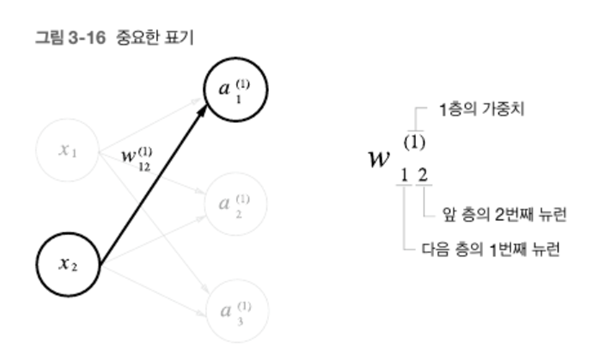

https://jamboard.google.com/d/1ZB2EJOoICHz1Sjyjk8Jg3nL8Sjl3jiNuH0lfwTbEmfA/viewer?pli=1&f=1

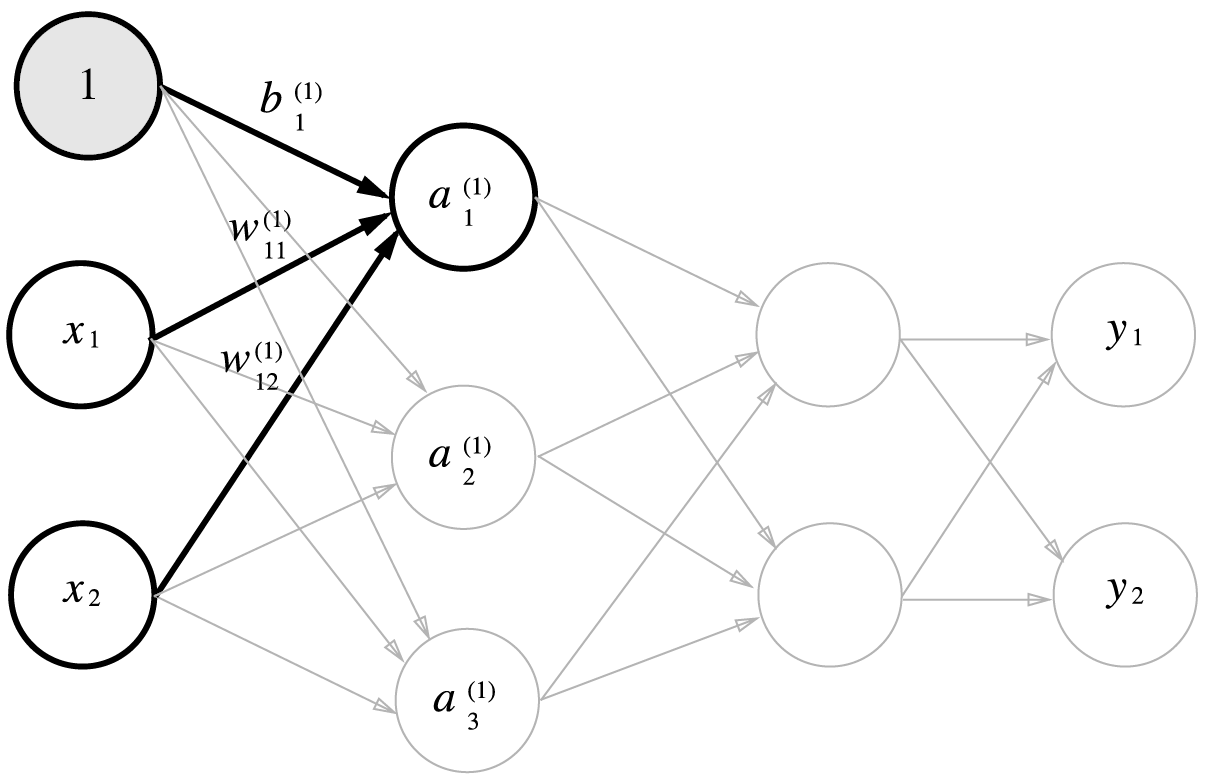

#### [그림 3-17] 수식으로 위 그림 표현

## $a^{(1)}_1$ 수식 : $$ a^{(1)}_1 = w^{(1)}_{11}x_1 + w^{(1)}_{12}x_2 + b^{(1)}_1 $$

## 행렬 이용한 식 :  $$ A^{(1)} = XW^{(1)} + B^{(1)} $$

## $$ A^{(1)} = (a^{(1)}_1 a^{(1)}_2 a^{(1)}_3 ); $$
## $$ X = (x_1 x_2); $$
## $$ B^{(1)} = (b^{(1)}_1 b^{(1)}_2 b^{(1)}_3 ) $$
## $$ W^{(1)} = \begin{pmatrix} w^{(1)}_{11} & w^{(1)}_{21} & w^{(1)}_{31}\\\ w^{(1)}_{12} & w^{(22)}_{32} & w^{(1)}_{31} \end{pmatrix} $$

https://jamboard.google.com/d/1ZB2EJOoICHz1Sjyjk8Jg3nL8Sjl3jiNuH0lfwTbEmfA/viewer?pli=1&f=2

In [28]:
X = np.array([1,.5])
W1 = np.array([[.1,.3,.5],[.2,.4,.6]])
B1 = np.array([.1,.2,.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

(2,)
(2, 3)
(3,)


In [33]:
A1 = np.dot(X,W1) + B1
print(A1)

[0.3 0.7 1.1]


#### [그림 3-18] 입력층에서 1층으로의 신호 전달

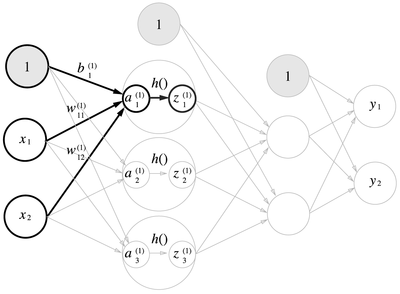

In [35]:
def sigmoid(x) :
    return 1/(1+np.exp(-x))

In [37]:
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [38]:
W2 = np.array([[.1,.4],[.2,.5],[.3,.6]])
B2 = np.array([.1,.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [39]:
A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)

In [40]:
def identity_function(x):
    return x

In [41]:
W3 = np.array([[.1,.3],[.2,.4]])
B3 = np.array([.1,.2])

A3 = np.dot(Z2,W3) + B3
Y = identity_function(A3)

In [44]:
print(A3)
print(Y)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


### 3.4.3 구현 정리 : 순전파 (forward propagation)

In [47]:
def init_network():
    network = {}
    network['W1'] = np.array([[.1,.3,.5],[.2,.4,.6]])
    network['b1'] = np.array([.1,.2,.3])
    network['W2'] = np.array([[.1,.4],[.2,.5],[.3,.6]])
    network['b2'] = np.array([.1,.2])
    network['W3'] = np.array([[.1,.3],[.2,.4]])
    network['b3'] = np.array([.1,.2])
    
    return network

In [50]:
def forward(network, x) :
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    Z1 = sigmoid(a1) # 위 정의
    a2 = np.dot(Z1, W2) + b2
    Z2 = sigmoid(a2)
    a3 = np.dot(Z2,W3) + b3
    y = identity_function(a3) #위 정의
    
    return y

In [52]:
network = init_network()
x = [1.,.5]
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


# 3.5 출력층 설계하기 

## 3.5.1 항등함수(identity function) & 소프트맥스 함수(softmax)

## 항등함수 :
## $$ \sigma () = y $$ 

## 소프트맥스 함수 :
## $$ y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)}$$

In [56]:
def softmax(x) :
    exp = np.exp(x)
    sum_e = np.sum(exp)
    return exp / sum_e

In [58]:
def csoftmax(x) :
    m = np.max(x)
    x = x - m
    exp = np.exp(x)
    sum_e = np.sum(exp)
    return exp / sum_e

In [60]:
a = np.array([.3,2.9,4])
print(softmax(a))
print(csoftmax(a))

[0.01821127 0.24519181 0.73659691]
1.0
[0.01821127 0.24519181 0.73659691]


In [61]:
# softmax 총합은 1
print(np.sum(softmax(a)))

1.0
